# timeSEries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# os.chdir("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets")

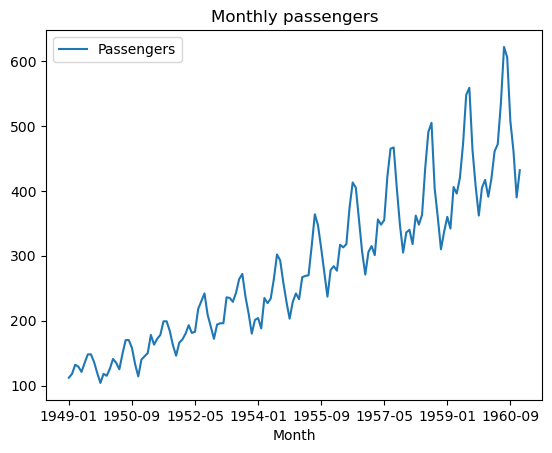

In [4]:
df = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\AirPassengers.csv", index_col = 0)
df.plot()
plt.title("Monthly passengers")
plt.show()

In [5]:
type(df.index)

pandas.core.indexes.base.Index

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 6.3+ KB


In [7]:
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [8]:
# df.index = pd.DatetimeIndex(df.index).to_period('Q')
# type(df.index)
# m_pass = df.resample('Q').sum()
# m_pass.index.rename('Quarter', inplace = True)
# m_pass.plot()
# plt.title('Quartly Passengers')
# plt.show()

In [9]:
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


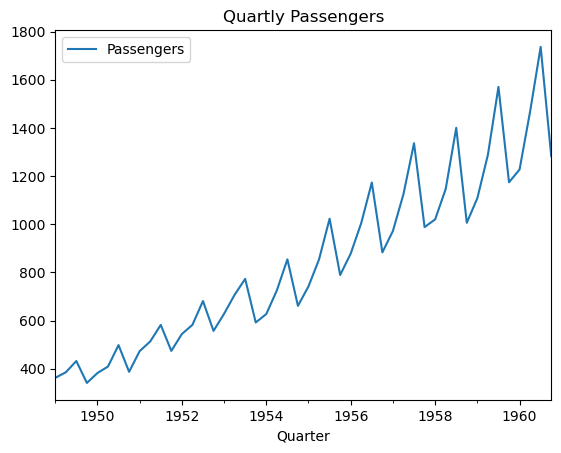

In [10]:
df.index = pd.DatetimeIndex(df.index)
m_pass = df.resample('QE').sum()
m_pass.index.rename('Quarter', inplace = True)
m_pass.plot()
plt.title('Quartly Passengers')
plt.show()

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_24536\1832208407.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  y_pass = df.resample('Y').sum()


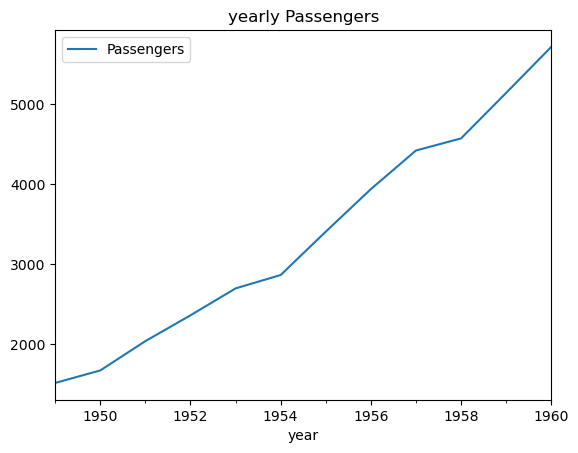

In [11]:
y_pass = df.resample('Y').sum()
y_pass.index.rename('year', inplace = True)
y_pass.plot()
plt.title('yearly Passengers')
plt.show()

# seasonal_decompose

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

`plt.rcParams` is a dictionary-like object in Matplotlib that contains default configurations for plot styles and layout options. The `"rc"` in rcParams stands for "run commands," and it stores default settings (like font sizes, colors, figure sizes, line widths, etc.) that control the appearance of plots globally across your session.

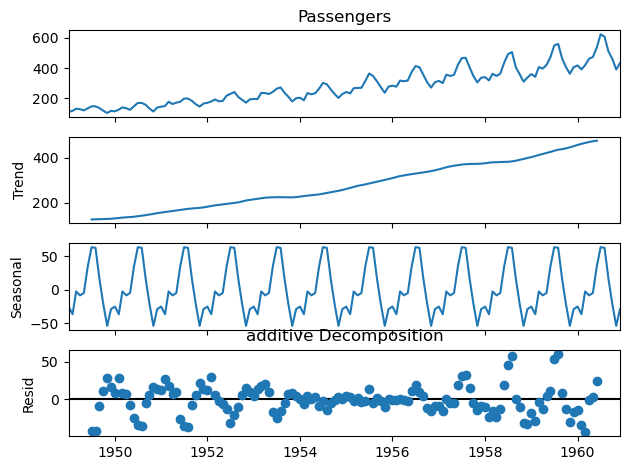

In [15]:
result = seasonal_decompose(df.iloc[:,0],model = 'additive',  period = 12)
result.plot()
# fig_size = plt.rcParams["figure.figsize"]
# fig_size = (20, 10)
plt.title("additive Decomposition")
plt.show()

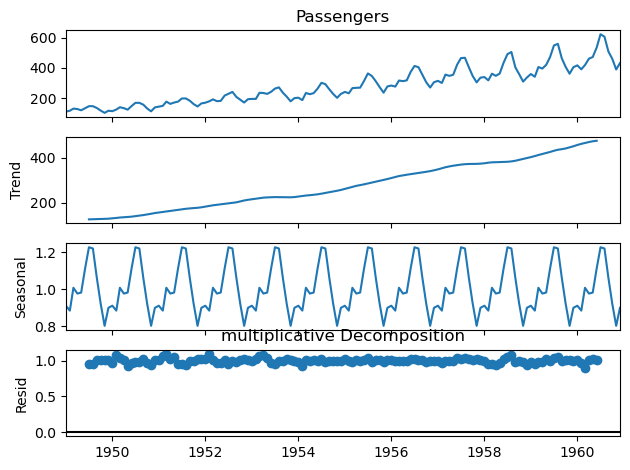

In [16]:
result = seasonal_decompose(df.iloc[:,0],model = 'multiplicative',  period = 12)
result.plot()
plt.title("multiplicative Decomposition")
plt.show()

# Rolling
- pattern is preserved but we don't see sharp up and down i.e it smoothes the graph
- ------------------------------------------------

- rolling centered mean

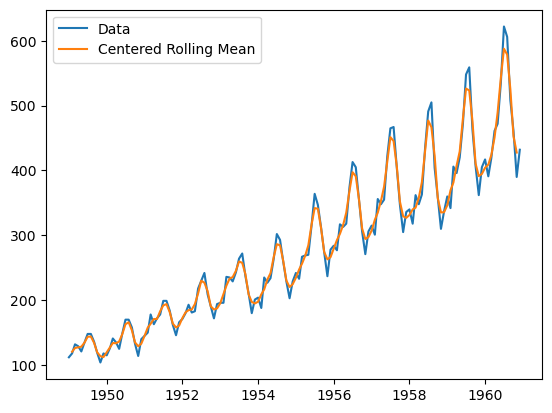

In [19]:
df1 = df.rolling(3, center = True).mean()
plt.plot(df.iloc[:,0], label = 'Data')
plt.plot(df1.iloc[:,0], label = 'Centered Rolling Mean')
plt.legend(loc = 'best')
plt.show()

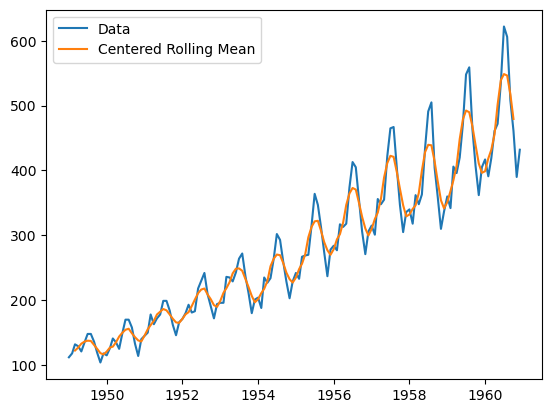

In [20]:
df1 = df.rolling(5, center = True).mean()
plt.plot(df.iloc[:,0], label = 'Data')
plt.plot(df1.iloc[:,0], label = 'Centered Rolling Mean')
plt.legend(loc = 'best')
plt.show()

# Temporal train test split

In [22]:
from sklearn.metrics import root_mean_squared_error

In [23]:
y = df.iloc[:,0]

In [24]:
y_train = y[:132]
y_test = y[132:]
y_train.shape, y_test.shape

((132,), (12,))

In [25]:
y


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

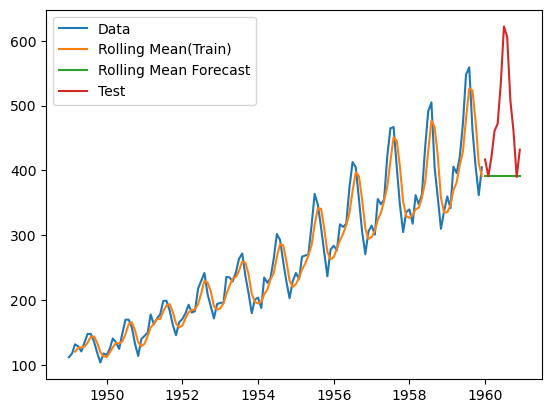

In [26]:
fcast = y_train.rolling(window = 3, center = False).mean()
MA = fcast.iloc[-1]  # for doing naive forecast
MA_fcast = pd.Series(MA.repeat(len(y_test)), index = y_test.index)
plt.plot(y_train, label ='Data')
plt.plot(fcast, label ='Rolling Mean(Train)')
plt.plot(MA_fcast, label = 'Rolling Mean Forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc= 'best')
plt.show()

In [27]:
print(fcast)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01    120.666667
1949-04-01    126.333333
1949-05-01    127.333333
                 ...    
1959-08-01    526.333333
1959-09-01    523.333333
1959-10-01    476.333333
1959-11-01    410.666667
1959-12-01    391.333333
Name: Passengers, Length: 132, dtype: float64


In [28]:
root_mean_squared_error(y_test, MA_fcast)

112.85462625283321

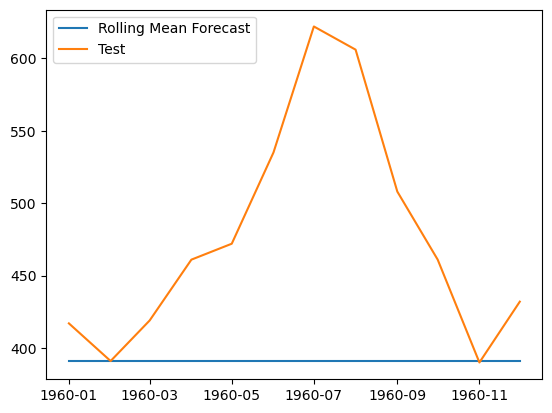

In [29]:
plt.plot(MA_fcast, label = 'Rolling Mean Forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc= 'best')
plt.show()

In [30]:
span=7
fcast=y_train.rolling(window=span, center= False).mean()
MA = fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index = y_test.index)
root_mean_squared_error(y_test, MA_fcast)
                                                       

76.28653914303472

# simple exponential smoothing

In [826]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [33]:
alpha=0.2
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [34]:
fcast1

1960-01-01    425.974608
1960-02-01    425.974608
1960-03-01    425.974608
1960-04-01    425.974608
1960-05-01    425.974608
1960-06-01    425.974608
1960-07-01    425.974608
1960-08-01    425.974608
1960-09-01    425.974608
1960-10-01    425.974608
1960-11-01    425.974608
1960-12-01    425.974608
Freq: MS, dtype: float64

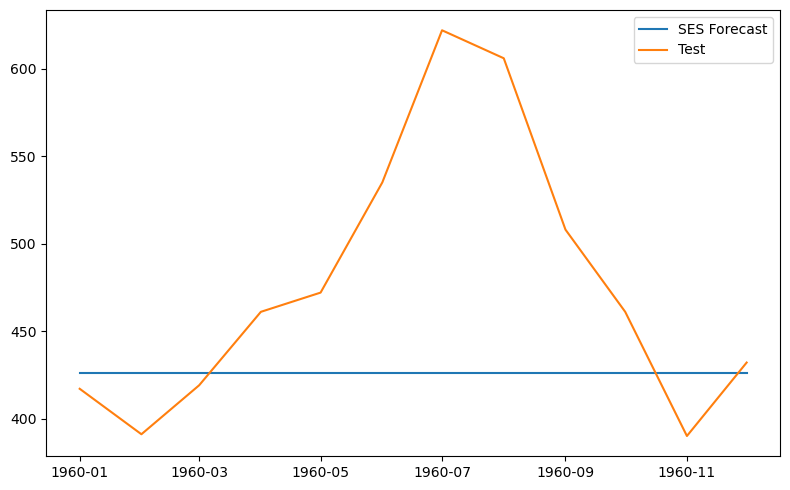

In [35]:
ses_fcast = pd.Series(fcast1, index=y_test.index)
plt.figure(figsize=(8,5))
error= round(root_mean_squared_error(y_test, ses_fcast), 2)
# plt.text(1,0.2, 'RMSE='+str(error))
plt.plot(ses_fcast,label = 'SES Forecast')
plt.plot(y_test, label ='Test')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
error

89.77

# Holt's Linear Trend

In [38]:
from statsmodels.tsa.api import Holt

In [39]:
holt = Holt(y_train)
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend = beta)
fcast1 = fit1.forecast(len(y_test))

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


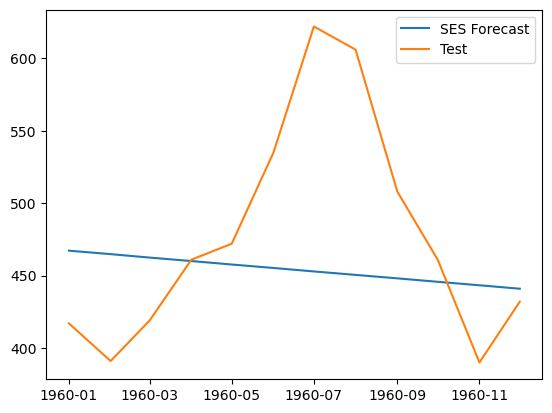

In [40]:
holt_fcast = pd.Series(fcast1, index =y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast),2)
# plt.text(x = 1, y = 100, f'RMSE={error}')
plt.plot(holt_fcast, label = 'SES Forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

# Holt's Exponential Trend

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


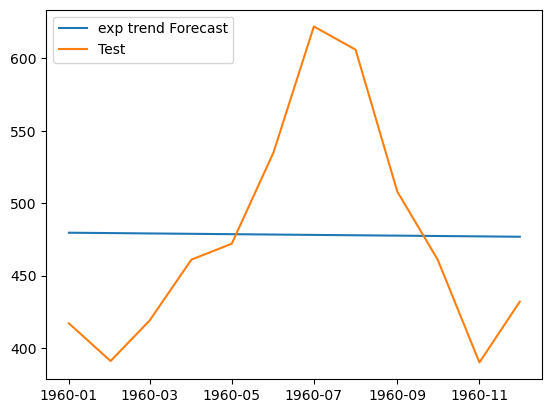

In [81]:
holt = Holt(y_train, exponential = True) # by default exponential = False
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend = beta)
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index =y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast),2)
# plt.text(1, 500, f'RMSE={error}')
plt.plot(holt_fcast, label = 'exp trend Forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

# Damped trend method

## Additive damped trend

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


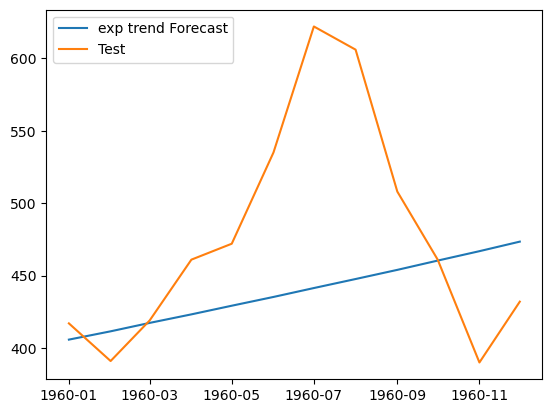

In [86]:
add_damp = Holt(y_train, exponential = True) # by default exponential = False
alpha, beta, phi = .8, .02, .1
fit1 = add_damp.fit(smoothing_level = alpha, smoothing_trend = beta, damping_trend = phi)
fcast1 = fit1.forecast(len(y_test))
holt_fcast = pd.Series(fcast1, index =y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast),2)
# plt.text(1, 500, f'RMSE={error}')
plt.plot(holt_fcast, label = 'exp trend Forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [90]:
error

82.67

## multiplicative damped trend

# Holt-Winters Seasonal Method

## Holt-Winter Additive Method

In [828]:
from statsmodels.tsa.api import ExponentialSmoothing

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


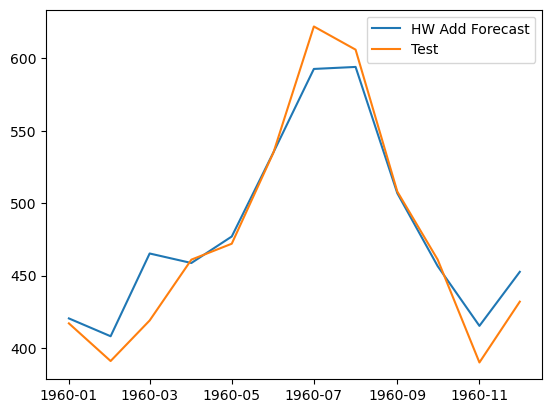

In [130]:
alpha, beta, gamma = .2, .1, .4
hw_a = ExponentialSmoothing(y_train, seasonal_periods = 12, trend = 'add', seasonal = 'add')
fit1 = hw_a.fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma)
fcast1 = fit1.forecast(len(y_test))
hw_a_cast = pd.Series(fcast1, index =y_test.index)
error = round(root_mean_squared_error(y_test, hw_a_cast),2)
# plt.text('1960-01', 500, f'RMSE={error}')
plt.plot(hw_a_cast, label = 'HW Add Forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [132]:
error

19.5

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


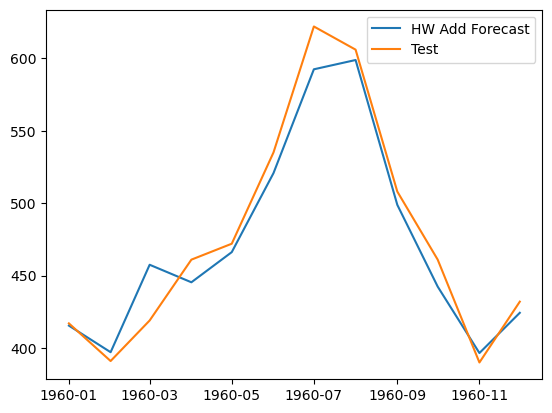

In [134]:
hw_a = ExponentialSmoothing(y_train, seasonal_periods = 12, trend = 'add', seasonal = 'add')
fit1 = hw_a.fit() # without parameter , it will autotune

fcast1 = fit1.forecast(len(y_test))
hw_a_cast = pd.Series(fcast1, index =y_test.index)
error = round(root_mean_squared_error(y_test, hw_a_cast),2)
# plt.text('1960-01', 500, f'RMSE={error}')
plt.plot(hw_a_cast, label = 'HW Add Forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [136]:
error

16.98

In [138]:
hw_a.params

{'smoothing_level': 0.2511602380805673,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.7488397619194327,
 'damping_trend': nan,
 'initial_level': 118.51999384834426,
 'initial_trend': 2.557835457422968,
 'initial_seasons': array([ -9.08170519,  -3.50771238,   8.98947133,   3.78126633,
         -4.94481313,   9.17090685,  21.36752582,  18.90668456,
          4.69812797, -14.23444734, -28.85659876, -12.48205932]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Holt-winters Multiplicative trends

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


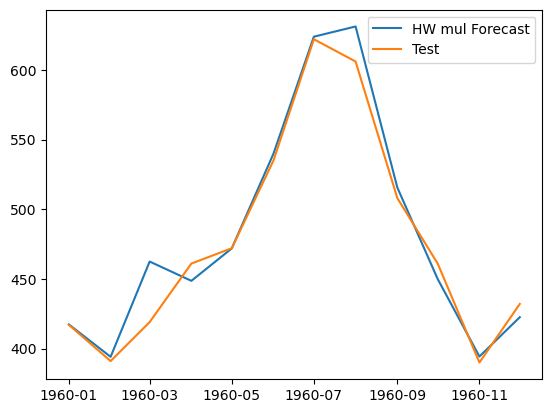

In [146]:
hw_m = ExponentialSmoothing(y_train, seasonal_periods = 12, trend = 'add', seasonal = 'mul')
fit1 = hw_m.fit() # without parameter , it will autotune

fcast1 = fit1.forecast(len(y_test))
hw_m_cast = pd.Series(fcast1, index =y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_cast),2)
# plt.text(1, 500, f'RMSE={error}')
plt.plot(hw_m_cast, label = 'HW mul Forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [148]:
error

15.81

## damped + holt winters

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


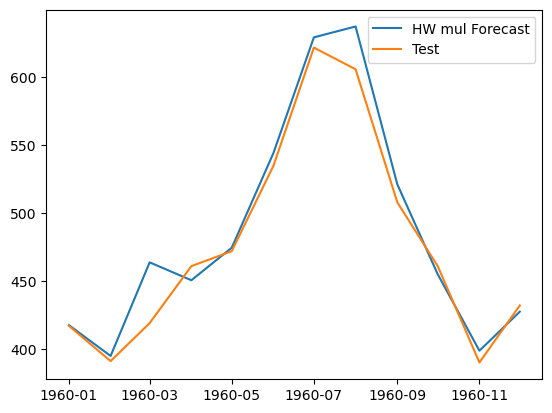

In [152]:
hw_m = ExponentialSmoothing(y_train, seasonal_periods = 12, trend = 'add', seasonal = 'mul', damped_trend = True)
fit1 = hw_m.fit() # without parameter , it will autotune

fcast1 = fit1.forecast(len(y_test))
hw_m_cast = pd.Series(fcast1, index =y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_cast),2)
# plt.text(1, 500, f'RMSE={error}')
plt.plot(hw_m_cast, label = 'HW mul Forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [154]:
error

17.27

# on milk production data

In [172]:
df = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\monthly-milk-production-pounds-p.csv", index_col = 0)
df.head()

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727


In [174]:
from statsmodels.tsa.api import ExponentialSmoothing

In [176]:
df.shape

(168, 1)

In [180]:
y_train = df[:156]
y_test = df[156:]
y_test.shape

(12, 1)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


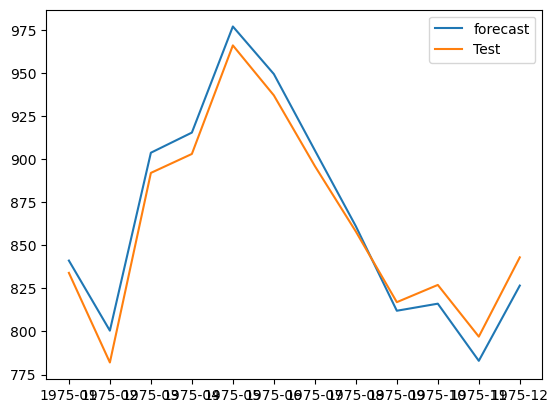

In [204]:
hw_a = ExponentialSmoothing(y_train, trend = 'add', seasonal = 'add', damped_trend = True)
fit3 = hw_a.fit()
hw_a_fit = fit3.forecast(len(y_test))
error = round(root_mean_squared_error(y_test, hw_a_fit), 2)
ser = pd.Series(hw_a_fit, index = y_test.index)
plt.plot(ser, label = 'forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

In [206]:
error

11.75

- resampling the series yearly

In [239]:
y_yearly = y.resample('YE').sum()

In [216]:
y_yearly.index.rename('Year', inplace = True)

In [243]:
y_yearly_train = y_yearly[:9]

In [245]:
y_yearly_test = y_yearly[9:]

In [247]:
y_yearly_test

Month
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: YE-DEC, Name: Passengers, dtype: int64

<Axes: xlabel='Month'>

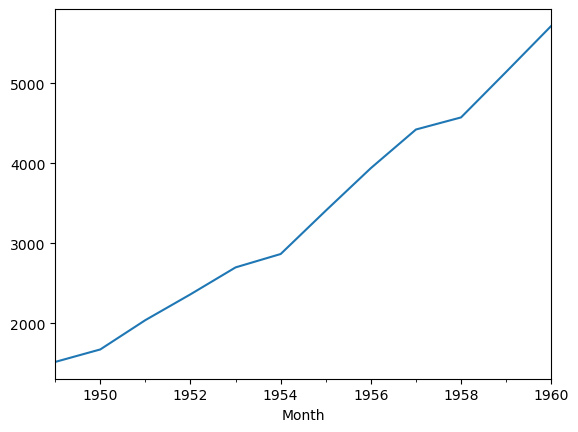

In [251]:
y_yearly.plot()

In [271]:
hw_m_cast

Month
1958-12-31    4898.712193
1959-12-31    5381.509992
1960-12-31    5864.307790
Freq: YE-DEC, dtype: float64

In [283]:
error

252.01

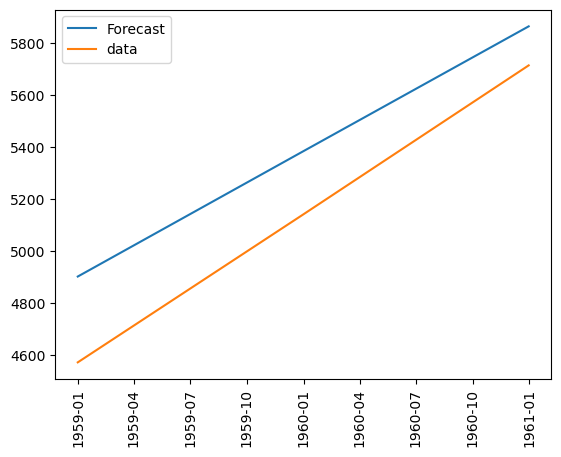

In [304]:
holt = Holt(y_yearly_train)
fit = holt.fit()
pred = fit.forecast(3)
pred_ser = pd.Series(pred, index = y_yearly_test.index)
error = round(root_mean_squared_error(y_yearly_test, pred_ser), 2)
plt.plot(pred_ser, label = 'Forecast')
plt.plot(y_yearly_test, label = 'data')
plt.legend()
plt.xticks(rotation = 90)
plt.show()
# plt.text(0, 0 , error)

In [309]:
fit.params

{'smoothing_level': 0.9950507499429093,
 'smoothing_trend': 0.5729289073316579,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1520.0,
 'initial_trend': 156.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [277]:
pred_ser

Month
1958-12-31    4902.022311
1959-12-31    5383.062768
1960-12-31    5864.103226
Freq: YE-DEC, dtype: float64

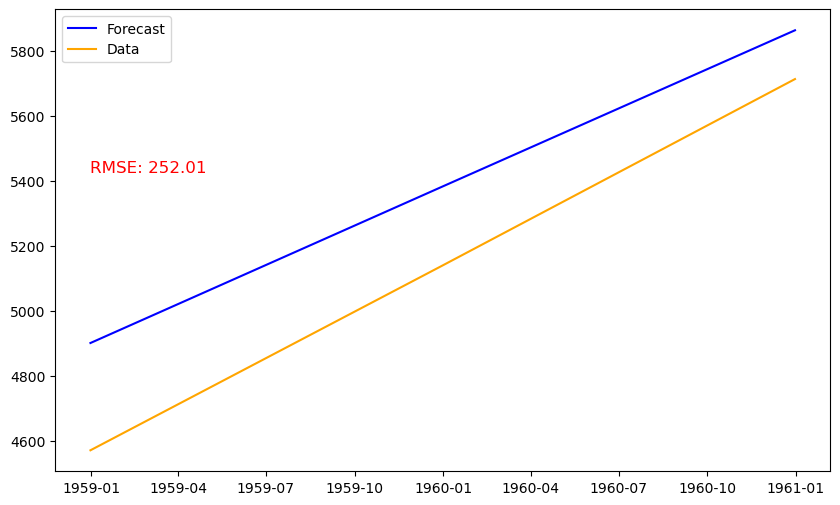

In [293]:
from statsmodels.tsa.holtwinters import Holt
import matplotlib.pyplot as plt

# Initialize and fit the Holt model
holt = Holt(y_yearly_train)
fit = holt.fit()

# Forecast and create a Series for the predicted values
pred = fit.forecast(3)
pred_ser = pd.Series(pred, index=y_yearly_test.index)

# Calculate error
error = round(root_mean_squared_error(y_yearly_test, pred_ser), 2)

# Plotting with a fixed figure size
plt.figure(figsize=(10, 6))  # Set the figure size to a suitable width and height
plt.plot(pred_ser, label='Forecast', color='blue')
plt.plot(y_yearly_test, label='Data', color='orange')
plt.legend()

# Position the error text in an appropriate spot on the plot
x_position = y_yearly_test.index[0]  # First index value for x
y_position = max(y_yearly_test) * 0.95  # Just below the maximum y value
plt.text(x_position, y_position, f'RMSE: {error}', fontsize=12, color='red')

# Show the plot
plt.show()


In [295]:
x_position

Timestamp('1958-12-31 00:00:00')

# monthly beer production

In [1032]:
df = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\monthly-beer-production-in-austr.csv", index_col = 0)

In [1034]:
y_train = df[: 452]
y_test = df[452: ]
y_test.shape

(24, 1)

In [343]:
from statsmodels.tsa.api import ExponentialSmoothing

<Axes: xlabel='Month'>

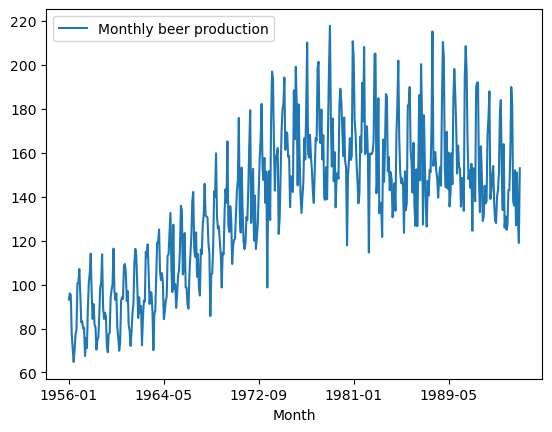

In [345]:
df.plot()

- using seasonal and trend as **add**

In [351]:
model = ExponentialSmoothing(y_train, trend = 'add', seasonal = 'add')
fit = model.fit()
pred = fit.forecast(len(y_test))
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, pred) , 2)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [357]:
error

11.85

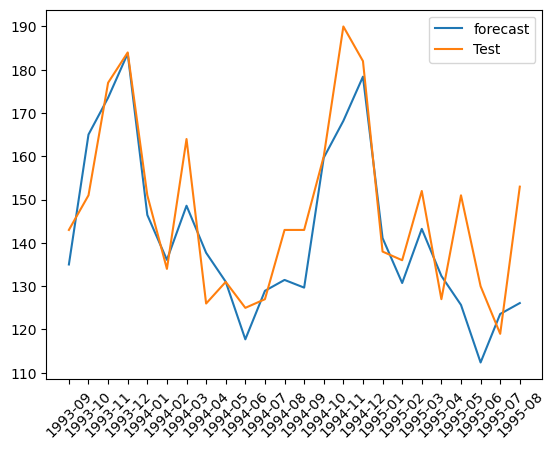

In [355]:
plt.plot(ser, label = 'forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.xticks(rotation = 45)
plt.show()

In [359]:
fit.params

{'smoothing_level': 0.0756649452665487,
 'smoothing_trend': 0.07566494525627845,
 'smoothing_seasonal': 0.10684118707904824,
 'damping_trend': nan,
 'initial_level': 86.21882036759584,
 'initial_trend': -0.006015930004927215,
 'initial_seasons': array([  5.47372794,  -1.90111389,   5.02401775,  -7.11444846,
        -11.10733046, -22.20801099, -14.51713447,  -8.88286276,
         -1.3009387 ,  12.57916985,  17.93270342,  27.14843461]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

- using damped

In [363]:
model = ExponentialSmoothing(y_train, trend = 'add', seasonal = 'add', damped_trend = True)
fit = model.fit()
pred = fit.forecast(len(y_test))
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, pred) , 2)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [369]:
error, fit.params

(10.47,
 {'smoothing_level': 0.07384462787824238,
  'smoothing_trend': 0.07384462774048021,
  'smoothing_seasonal': 0.10551821691894313,
  'damping_trend': 0.9826039153362622,
  'initial_level': 86.41847805369963,
  'initial_trend': -0.022611727775251864,
  'initial_seasons': array([  5.46578911,  -1.92284331,   5.05802272,  -7.09892586,
         -11.08736684, -22.22585305, -14.51634489,  -8.8661971 ,
          -1.31578294,  12.61274493,  18.00179482,  27.26323121]),
  'use_boxcox': False,
  'lamda': None,
  'remove_bias': False})

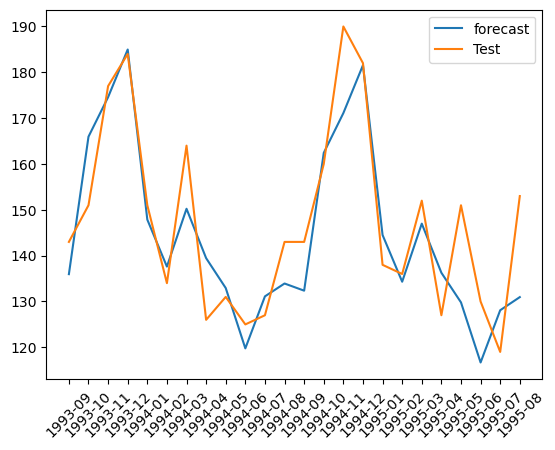

In [367]:
plt.plot(ser, label = 'forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.xticks(rotation = 45)
plt.show()

In [372]:
model = ExponentialSmoothing(y_train, trend = 'add', seasonal = 'mul', damped_trend = True)
fit = model.fit()
pred = fit.forecast(len(y_test))
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, pred) , 2)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [380]:
error, fit.params

(10.2,
 {'smoothing_level': 0.07902298785088277,
  'smoothing_trend': 0.07902296069082827,
  'smoothing_seasonal': 7.582248544556768e-05,
  'damping_trend': 0.9828100461255269,
  'initial_level': 68.75009278401019,
  'initial_trend': 0.0890512445657577,
  'initial_seasons': array([1.2782719 , 1.19849835, 1.29956809, 1.182091  , 1.143214  ,
         1.02106952, 1.10917202, 1.15969423, 1.18039131, 1.36803545,
         1.44348558, 1.55723475]),
  'use_boxcox': False,
  'lamda': None,
  'remove_bias': False})

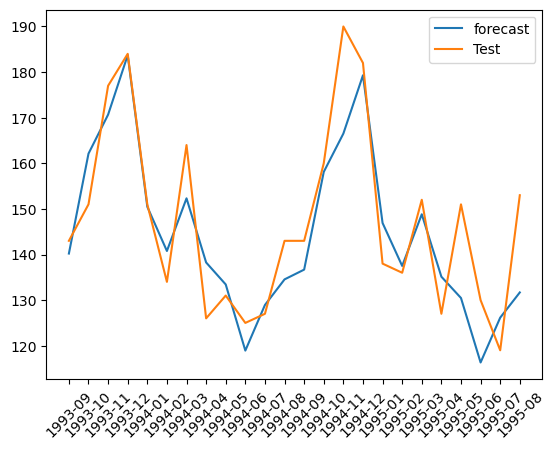

In [376]:
plt.plot(ser, label = 'forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.xticks(rotation = 45)
plt.show()

- using custom alpha beta gamma

In [401]:
model = ExponentialSmoothing(y_train, trend = 'add', seasonal = 'mul', damped_trend = True)
fit = model.fit(smoothing_level = 0.1,smoothing_trend = 0.3, smoothing_seasonal= 0.001 )
pred = fit.forecast(len(y_test))
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, pred) , 2)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [403]:
error

9.56

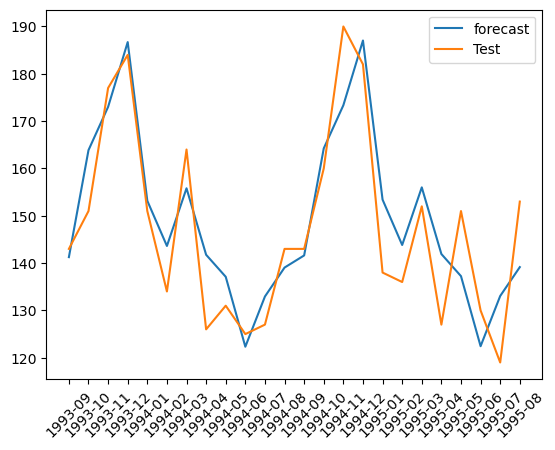

In [405]:
plt.plot(ser, label = 'forecast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.xticks(rotation = 45)
plt.show()

# BoxCox:

<Axes: xlabel='Date'>

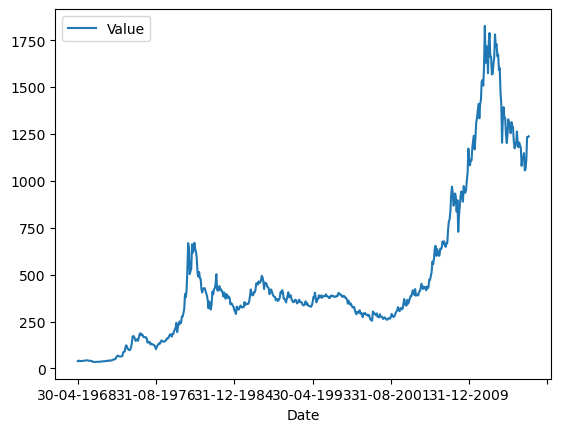

In [1115]:
bank = pd.read_csv('C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\BUNDESBANK-BBK01_WT5511.csv', index_col=0)
y_train= bank[:-12]
y_test= bank[-12:]
bank.head()
bank.plot()

In [1099]:
from scipy.special import boxcox, inv_boxcox # inverse boxcox

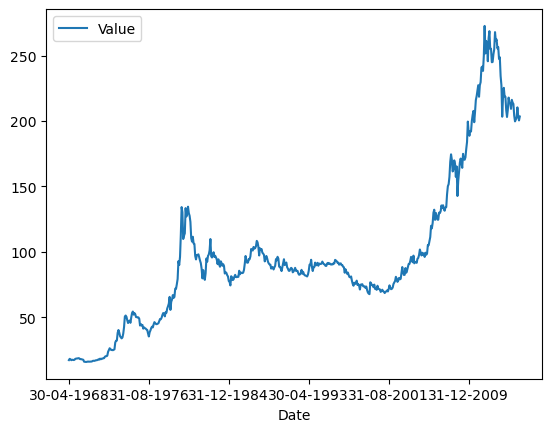

In [1117]:
lamb = 0.7 # the smaller the lambda , the smaller the range of transformation of 
# with -0.7 , rmse is coming better
y= bank['Value']
y_trans_trn= boxcox(y_train, lamb)
y_trans_trn.plot()
plt.show()

In [1119]:
model1 = auto_arima(y_trans_trn, trace = True, error_action = 'ignore', suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3333.355, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3330.015, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3329.196, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3328.885, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3330.893, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3330.203, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3329.692, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3331.559, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3330.256, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.722 seconds


In [1121]:
y_trans_pred= model1.predict(n_periods= 12)
y_pred= inv_boxcox(y_trans_pred, lamb)
root_mean_squared_error(y_test, y_pred)

94.74230082263276

In [1123]:
y_test.values, y_trans_pred.values, y_pred.values

(array([[1190.4 ],
        [1175.  ],
        [1080.05],
        [1125.5 ],
        [1122.5 ],
        [1147.75],
        [1055.65],
        [1062.25],
        [1112.9 ],
        [1234.15],
        [1233.6 ],
        [1237.7 ]]),
 array([203.55756017, 203.88735673, 204.2171533 , 204.54694986,
        204.87674643, 205.20654299, 205.53633956, 205.86613613,
        206.19593269, 206.52572926, 206.85552582, 207.18532239]),
 array([1205.52168855, 1208.29340176, 1211.06702371, 1213.84255263,
        1216.61998679, 1219.39932445, 1222.18056386, 1224.9637033 ,
        1227.74874103, 1230.53567534, 1233.32450451, 1236.11522681]))

##### Without transformation

In [1084]:
model = auto_arima(y_train, trace = True, error_action = 'ignore', suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5622.164, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5618.047, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5617.332, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5622.101, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5618.606, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5618.188, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5617.812, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.789 seconds


In [1086]:
y_pred= model.predict(n_periods= 12)
y_pred

2015-05-31    1204.157967
2015-06-30    1206.219806
2015-07-31    1208.281644
2015-08-31    1210.343483
2015-09-30    1212.405321
2015-10-31    1214.467160
2015-11-30    1216.528998
2015-12-31    1218.590837
2016-01-31    1220.652675
2016-02-29    1222.714514
2016-03-31    1224.776352
2016-04-30    1226.838191
Freq: ME, dtype: float64

In [1088]:
y_test

,Value
Date,
31-05-2015,1190.40
30-06-2015,1175.00
31-07-2015,1080.05
31-08-2015,1125.50
30-09-2015,1122.50
31-10-2015,1147.75
30-11-2015,1055.65
31-12-2015,1062.25
31-01-2016,1112.90


In [1090]:
root_mean_squared_error(y_test, y_pred)

91.10508106510662

# Stationary test
- it should not have trend and mean and variance should be constant

In [426]:
from statsmodels.tsa.stattools import adfuller

In [447]:
df = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\monthly-milk-production-pounds-p.csv", index_col = 0)
y = df['Milk']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

<Axes: xlabel='Month'>

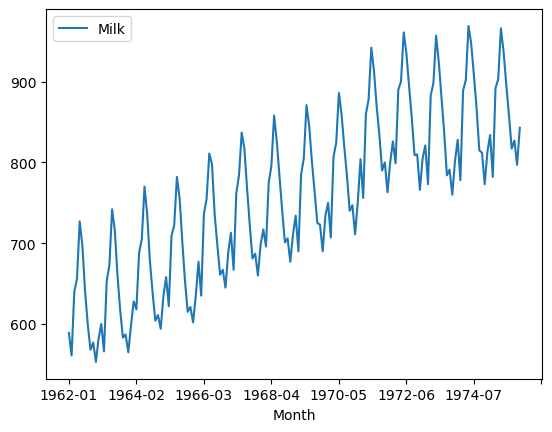

In [449]:
df.plot()

In [453]:
result = adfuller(y, maxlag = 10)
print("P-Value =", result[1])
if result[1] < 0.05:
    print("Time Series is Stationary")
else:
    print("Time Series is not Stationary")

P-Value = 0.6443832606930102
Time Series is not Stationary


- taking first order difference

In [461]:
result = adfuller(y.diff()[1:], maxlag = 10)
print("P-Value =", result[1])
if result[1] < 0.05:
    print("Time Series is Stationary")
else:
    print("Time Series is not Stationary")

P-Value = 0.0
Time Series is Stationary


(-26.040316081023786,
 0.0,
 10,
 156,
 {'1%': -3.4729792729247793,
  '5%': -2.8802520918255534,
  '10%': -2.5767469641683105},
 1318.5600991082201)

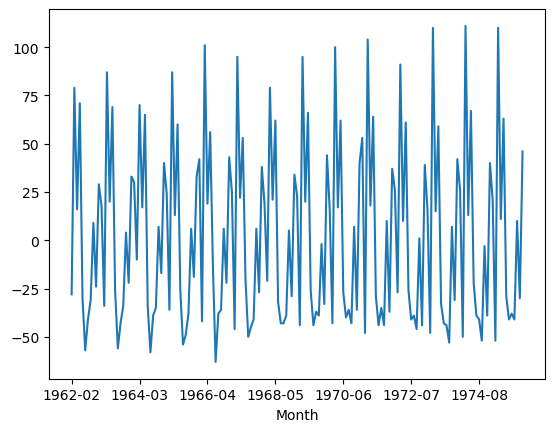

In [463]:
y.diff()[1:].plot()
result

# ACF (autocoreelation function)

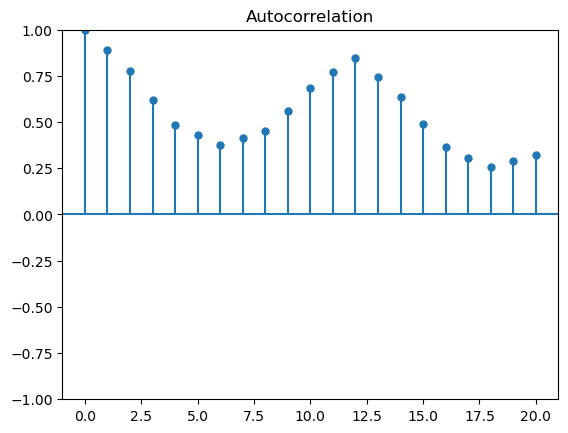

In [473]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, lags = 20, alpha = None)
plt.show()

In [480]:
coal = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\Coal Consumption.csv", index_col = 0)

In [482]:
coal.head()

,Amount
Month,
1/1/1990,16.50
2/1/1990,15.17
3/1/1990,12.75
4/1/1990,12.31
5/1/1990,8.34


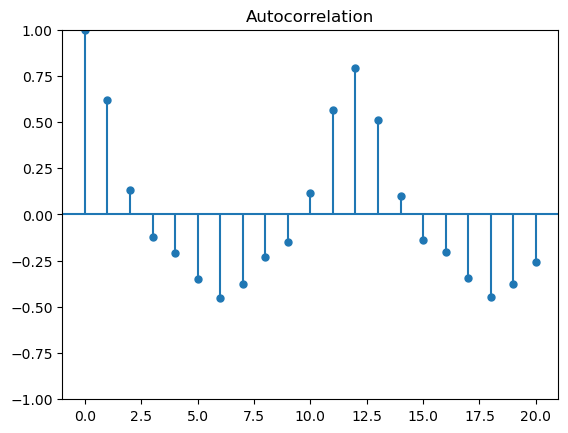

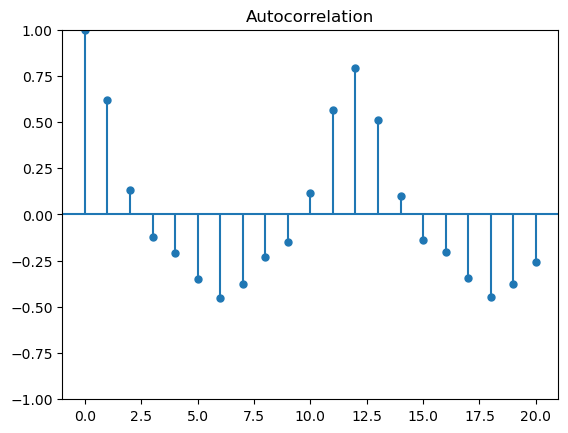

In [494]:
plot_acf(coal['Amount'], lags = 20, alpha = None) # this plot is called needle plo


# Autoregressive Models (ARIMA)

In [525]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [620]:
y_train = df[:156]
y_test = df[156:]
y_train.shape, y_test.shape

((156, 1), (12, 1))

In [622]:
model =ARIMA(y_train, order=(1,0,0), freq='MS')# order=(order of AR model =p,Order of differencing = d, Order of Moving Average Model =q)
model_fit = model.fit()
model_fit.params

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const      741.622665
ar.L1        0.900561
sigma2    1933.729258
dtype: float64

In [624]:
y_train.shape

(156, 1)

In [626]:
y_pred= model_fit.predict(start=len(y_train), end=len(y_train)+ len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

98.7546080336063

In [628]:
y_pred.index = y_test.index

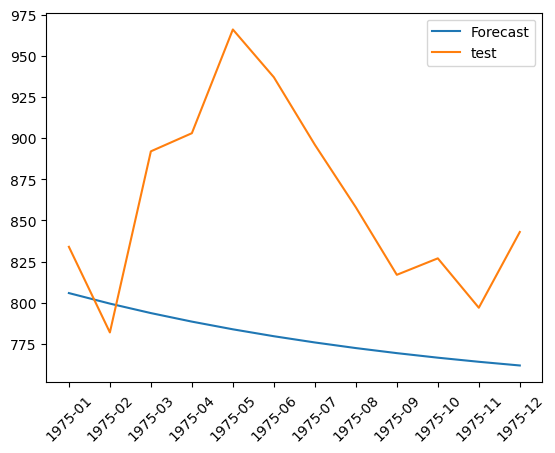

In [630]:
plt.plot(y_pred,label ='Forecast')
plt.plot(y_test,label= 'test')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### experimwnt using manual differece

In [633]:
diff_1 = y.diff()[1:]

In [649]:
y_train = diff_1[:156]
y_test = diff_1[156:]
y_test.shape

(11,)

In [651]:
model =ARIMA(y_train, order=(1,0,0), freq='MS')# order=(order of AR model =p,Order of differencing = d, Order of Moving Average Model =q)
model_fit = model.fit()
model_fit.params

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const        1.569258
ar.L1        0.038679
sigma2    2016.088713
dtype: float64

In [694]:
# const     - constants   
# ar.L1     - slope, coefficient  
# sigma2    - noise

In [653]:
y_pred= model_fit.predict(start=len(y_train), end=len(y_train)+ len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

50.209197681027185

In [655]:
y_pred.index = y_test.index

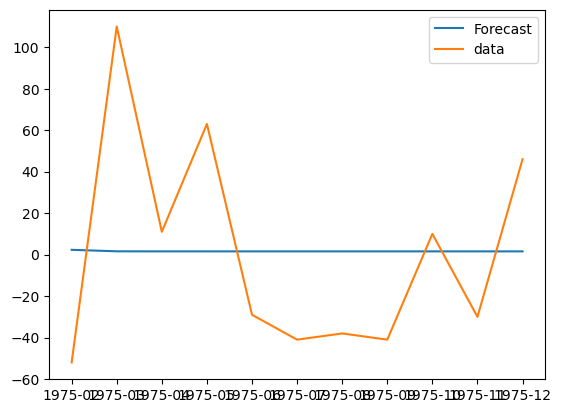

In [657]:
plt.plot(y_pred, label = 'Forecast')
plt.plot(y_test, label = 'data')
plt.legend(loc = 'best')

### using order of dofference parameter of **ARIMA**

In [659]:
y_train = df[:-12]
y_test = df[-12:]
y_train.shape, y_test.shape

((156, 1), (12, 1))

In [688]:
model =ARIMA(y_train, order=(12,2,0), freq='MS')# order=(order of AR model =p,Order of differencing = d, Order of Moving Average Model =q)
model_fit = model.fit()
model_fit.params

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ar.L1      -1.059579
ar.L2      -1.048796
ar.L3      -1.027108
ar.L4      -1.024535
ar.L5      -1.038352
ar.L6      -1.069650
ar.L7      -1.019600
ar.L8      -1.016172
ar.L9      -1.064349
ar.L10     -1.034276
ar.L11     -0.987310
ar.L12     -0.091607
sigma2    195.410721
dtype: float64

In [689]:
y_pred= model_fit.predict(start=len(y_train), end=len(y_train)+ len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

15.483923167180965

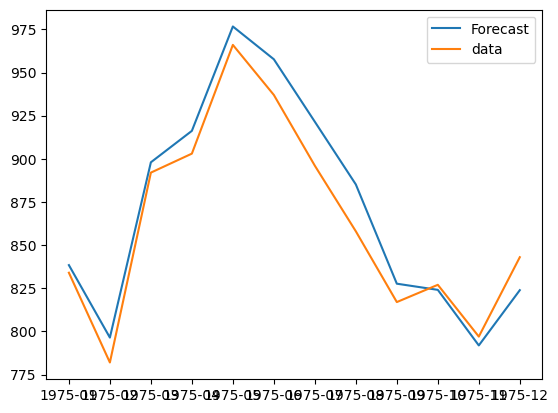

In [690]:
y_pred.index = y_test.index
plt.plot(y_pred, label = 'Forecast')
plt.plot(y_test, label = 'data')
plt.legend(loc = 'best')

## SARIMA

In [696]:
model = ARIMA(y_train, order=(0,0,1), freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+ len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


126.20472442575637

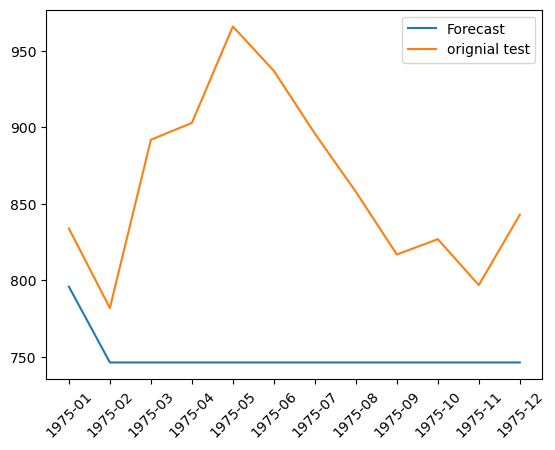

In [705]:
y_pred.index = y_test.index
plt.plot(y_pred,label='Forecast')
plt.plot(y_test, label='orignial test')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## arma

In [708]:
model = ARIMA(y_train, order=(12,1,1), freq='MS')
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+ len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


14.213366929213676

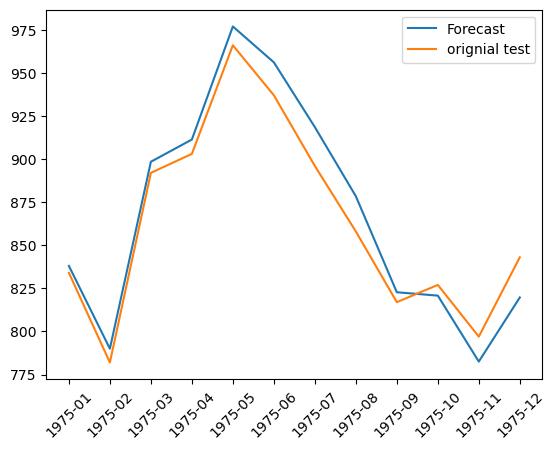

In [710]:
y_pred.index = y_test.index
plt.plot(y_pred,label='Forecast')
plt.plot(y_test, label='orignial test')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# SARIMA

In [723]:
model = ARIMA(y_train ,order = (3,1,0), freq = 'MS', seasonal_order = (1, 1, 1, 12))
model_fit = model.fit()
y_pred = model_fit.predict(start = len(y_train), end = len(y_train) + len(y_test) - 1)
root_mean_squared_error(y_test, y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


10.448496929973517

In [725]:
model_fit.params

ar.L1       -0.263642
ar.L2       -0.044438
ar.L3        0.097068
ar.S.L12    -0.051477
ma.S.L12    -0.579486
sigma2      53.356117
dtype: float64

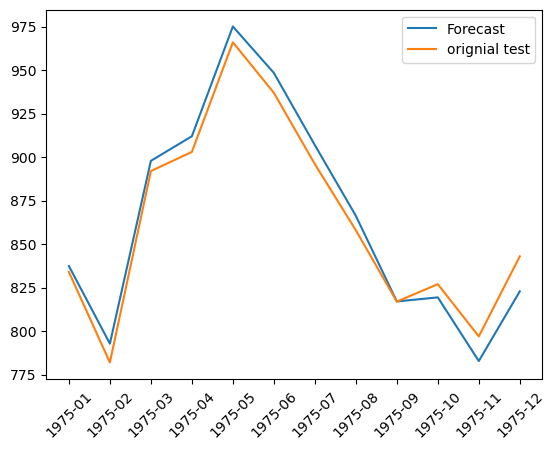

In [727]:
y_pred.index = y_test.index
plt.plot(y_pred,label='Forecast')
plt.plot(y_test, label='orignial test')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## tuning ARIMA
- trace=True allows you to see detailed output 

In [732]:
from pmdarima.arima import auto_arima

In [752]:
model = auto_arima(y_train, trace = True, error_action = 'ignore', suppress_warnings = True) 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.691, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1572.571, Time=0.75 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1562.631, Time=0.95 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 s

In [ ]:
# AIC: AkaiKe's Information Criteria (AkaiKe was japanese scientist) is quivalent to mean_squared_error
# Lower the AIC, better is the model
# IN GridSearchCV we gave params dictionary. similarly

In [754]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test, y_pred)

60.723396992885554

## Tuning SARIMA

In [758]:
model = auto_arima(y_train, trace = True, error_action = 'ignore', suppress_warnings = True, seasonal=True, m=12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=1.99 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.46 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=1.43 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.43 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=3.25 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=1.22 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.38 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=0.84 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.28 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=1.10 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=2.18 sec
 ARIMA(1,0,2)(1,1,0)[12] int

In [760]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test, y_pred)

13.941102797547243

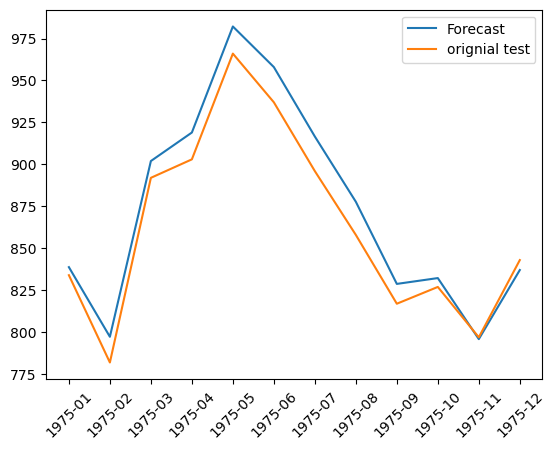

In [770]:
y_pred.index = y_test.index
plt.plot(y_pred,label='Forecast')
plt.plot(y_test, label='orignial test')
plt.xticks(rotation=45)
plt.legend()

###### model = auto_arima(y_train, trace = True, error_action = 'ignore', suppress_warnings = True,stepwise= False) 
###### iterations limited due to stepwise = True


## BUNDESBANK Dataset

In [787]:
bank = pd.read_csv('C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\BUNDESBANK-BBK01_WT5511.csv', index_col=0)
bank.head()

,Value
Date,
30-04-1968,39.10
31-05-1968,42.00
30-06-1968,40.95
31-07-1968,38.90
31-08-1968,39.85


In [789]:
y_train= bank[:-12]
y_test= bank[-12:]

<Figure size 2000x800 with 0 Axes>

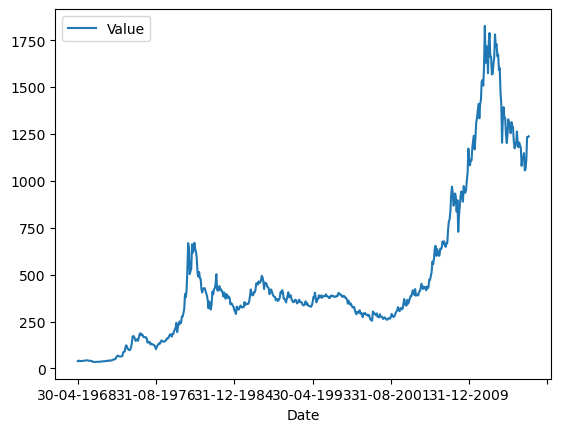

In [801]:
plt.figure(figsize = (20,8))
bank.plot()
plt.show()

In [803]:
model = auto_arima(y_train, trace = True, error_action = 'ignore', suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5622.164, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5618.047, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5617.332, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5622.101, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5618.606, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5618.188, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5617.812, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.676 seconds


In [805]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test, y_pred)

91.10508106510662

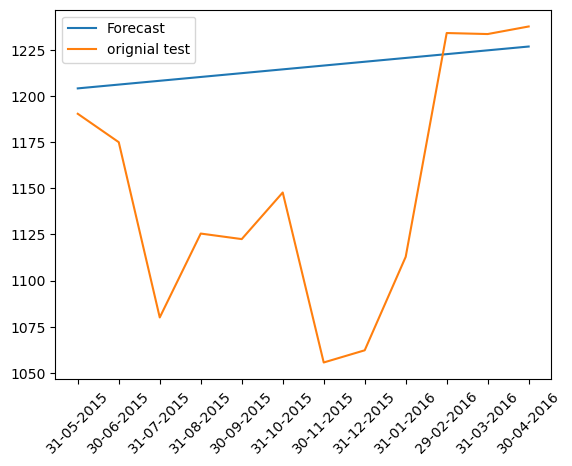

In [807]:
y_pred.index = y_test.index
plt.plot(y_pred,label='Forecast')
plt.plot(y_test, label='orignial test')
plt.xticks(rotation=45)
plt.legend()

In [809]:
model = auto_arima(y_train, trace = True, error_action = 'ignore', suppress_warnings = True, seasonal=True, m=12) 


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5615.321, Time=3.24 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5622.164, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5619.560, Time=0.56 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5618.957, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5622.101, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5613.419, Time=2.69 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5611.792, Time=5.70 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5617.378, Time=7.59 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.15 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=5622.630, Time=3.60 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=5626.629, Time=4.11 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=5626.630, Time=5.15 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5621.194, Time=2.32 sec
 ARIMA(1,1,3)(0,0,2)[12] inte

In [810]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test, y_pred)

106.01078934580089

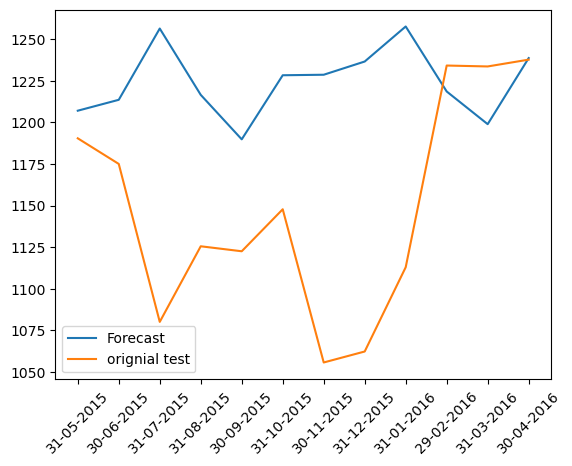

In [811]:
y_pred.index = y_test.index
plt.plot(y_pred,label='Forecast')
plt.plot(y_test, label='orignial test')
plt.xticks(rotation=45)
plt.legend()

## AUS GAS dataset

In [1126]:
aus = pd.read_csv('C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\AusGas.csv', index_col=0)
aus.head()

,GasProd
Month,
Jan-1956,1709
Feb-1956,1646
Mar-1956,1794
Apr-1956,1878
May-1956,2173


In [1128]:
# Smoothing
y_train= aus[:-12]
y_test= aus[-12:]


In [848]:
y_train.shape

(464, 1)

- using holt winter

In [856]:
from statsmodels.tsa.api import ExponentialSmoothing
hw_a = ExponentialSmoothing(y_train, seasonal_periods = 12, trend = 'add', seasonal = 'mul')
fit = hw_a.fit()
pred = fit.forecast(len(y_test))
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, ser), 2)
error

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2388.52

- using boxcox

In [1132]:
y_trans_trn= boxcox(y_train, 0.7) # lambda= 0.7
model = auto_arima(y_trans_trn, trace = True, error_action = 'ignore', suppress_warnings = True)
y_trans_pred = model.predict(n_periods= len(y_test))
y_pred=inv_boxcox(y_trans_pred, 0.7)
root_mean_squared_error(y_test, y_pred)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5347.391, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5698.313, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5655.072, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5669.112, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5697.864, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5640.860, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5641.696, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5299.489, Time=1.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5492.878, Time=0.72 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5319.405, Time=1.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5454.186, Time=0.88 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=5304.4

3047.1433570556464

In [1134]:
root_mean_squared_error(y_test, y_pred)

3047.1433570556464

In [1144]:
hw_A = ExponentialSmoothing(y_trans_trn, seasonal_periods = 12, trend = 'add', seasonal = 'add', damped_trend = True)
fir = hw_A.fit()
y_trans_pred = fir.forecast(12)
pred= inv_boxcox(y_trans_pred, 0.7)
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, ser), 2)
error

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2344.73

## AUS GAS Dataset

In [865]:
aus = pd.readscsv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\AusGas.csv", index_col = 0)


In [868]:
y_train=aus[:-12]
y_test= aus[-12:]

In [878]:
model = ARIMA(y_train, order=(1,2,1), seasonal_order = (1,2,1,24))
fit=model.fit()
y_pred= fit.predict(start= len(y_train), end= len(y_train)+ len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency i

4089.6003651635724

In [880]:
model = auto_arima(y_train, trace = True, error_action = 'ignore', suppress_warnings = True, seasonal=True, m=12)
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test, y_pred)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=1.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8170.932, Time=2.01 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.67 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.659, Time=3.37 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8208.277, Time=4.13 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.71 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.58 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=1.39 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

3449.0026759037787

In [908]:
hw_A = ExponentialSmoothing(y_train, seasonal_periods = 12, trend = 'add', seasonal = 'add', damped_trend = True)
fir = hw_A.fit()
pred = fir.forecast(12)
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, ser), 2)
error

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2390.06

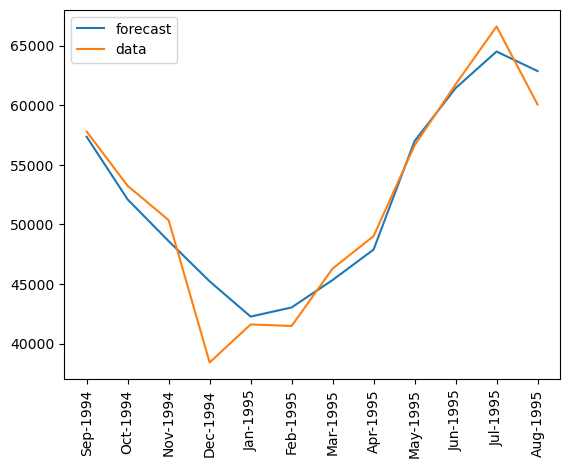

In [909]:
plt.plot(ser, label='forecast')
plt.plot(y_test, label = 'data')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [911]:
hw_A = ExponentialSmoothing(y_train, seasonal_periods = 12, trend = 'add', seasonal = 'mul', damped_trend = True)
fir = hw_A.fit()
pred = fir.forecast(12)
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, ser), 2)
error

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2312.59

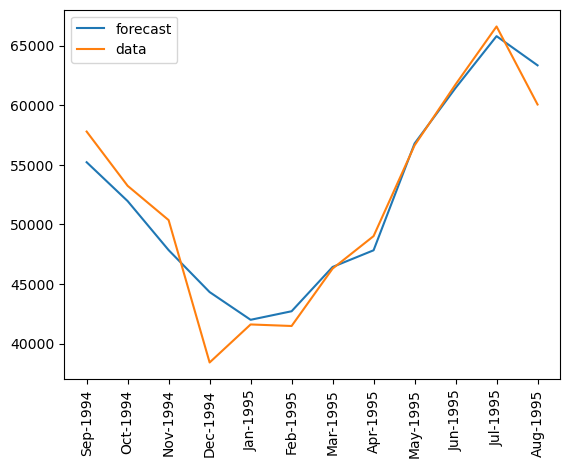

In [913]:
plt.plot(ser, label='forecast')
plt.plot(y_test, label = 'data')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [918]:
fir.params

{'smoothing_level': 0.42928571428571427,
 'smoothing_trend': 0.022593984962406014,
 'smoothing_seasonal': 0.05435374149659864,
 'damping_trend': 0.99,
 'initial_level': 2035.7194444444433,
 'initial_trend': 6.367676767676919,
 'initial_seasons': array([0.81539998, 0.79507383, 0.87589192, 0.91953034, 1.09412042,
        1.1606518 , 1.24410076, 1.18186265, 1.08018072, 1.03345119,
        0.92163466, 0.87810173]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [932]:
hw_A = ExponentialSmoothing(y_train, seasonal_periods = 12, trend = 'add', seasonal = 'mul', damped_trend = True)
fir = hw_A.fit(smoothing_level=  0.5, smoothing_seasonal = 0.1)
pred = fir.forecast(12)
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, ser), 2)
error

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2288.66

In [924]:
fir.params

{'smoothing_level': 0.5,
 'smoothing_trend': 0.016666666666666666,
 'smoothing_seasonal': 0.051666666666666666,
 'damping_trend': 0.99,
 'initial_level': 2035.7194444444433,
 'initial_trend': 6.367676767676919,
 'initial_seasons': array([0.81539998, 0.79507383, 0.87589192, 0.91953034, 1.09412042,
        1.1606518 , 1.24410076, 1.18186265, 1.08018072, 1.03345119,
        0.92163466, 0.87810173]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Shampoo dataset

In [937]:
shampo = pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\sales-of-shampoo-over-a-three-ye.csv", index_col = 0)

In [939]:
y_train = shampo[:-12]
y_test = shampo[-12:]

<Axes: xlabel='Month'>

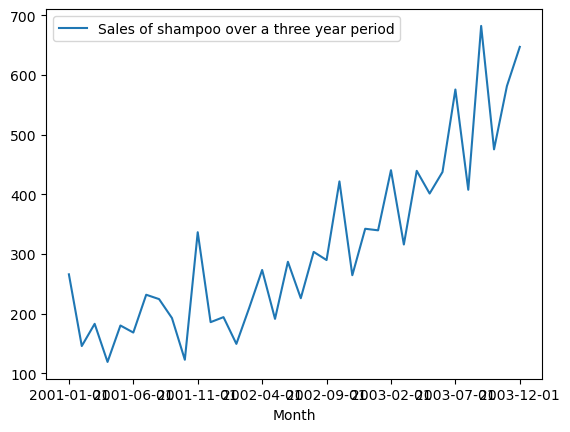

In [941]:
shampo.plot()

- using halt winters

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


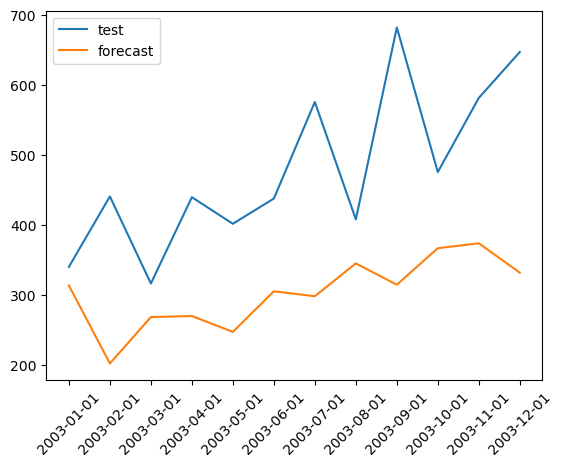

In [957]:
hw_a = ExponentialSmoothing(y_train, trend = 'add', seasonal = 'mul', damped_trend = True, seasonal_periods = 12)
fit = hw_a.fit()
pred = fit.forecast(12)
ser = pd.Series(pred, index = y_test.index)
error = round((root_mean_squared_error(y_test, pred)), 2)
plt.plot(y_test, label = 'test')
plt.plot(ser, label = 'forecast')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [959]:
error

204.42

- using halt

In [971]:
holt = Holt(y_train, exponential = True, damped_trend = True)
fit = holt.fit()
pred = fit.forecast(12)
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, pred),2)
error

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


72.74

In [977]:
fit.params

{'smoothing_level': 0.41496021699053043,
 'smoothing_trend': 0.3170274499254776,
 'smoothing_seasonal': nan,
 'damping_trend': 0.9900888296240543,
 'initial_level': 266.0,
 'initial_trend': 0.5572942842677316,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [985]:
holt = Holt(y_train, exponential = True, damped_trend = True)
fit = holt.fit()
pred = fit.forecast(len(y_test))
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, pred),2)
error

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


72.74

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2003-01-01'),
  Text(1, 0, '2003-02-01'),
  Text(2, 0, '2003-03-01'),
  Text(3, 0, '2003-04-01'),
  Text(4, 0, '2003-05-01'),
  Text(5, 0, '2003-06-01'),
  Text(6, 0, '2003-07-01'),
  Text(7, 0, '2003-08-01'),
  Text(8, 0, '2003-09-01'),
  Text(9, 0, '2003-10-01'),
  Text(10, 0, '2003-11-01'),
  Text(11, 0, '2003-12-01')])

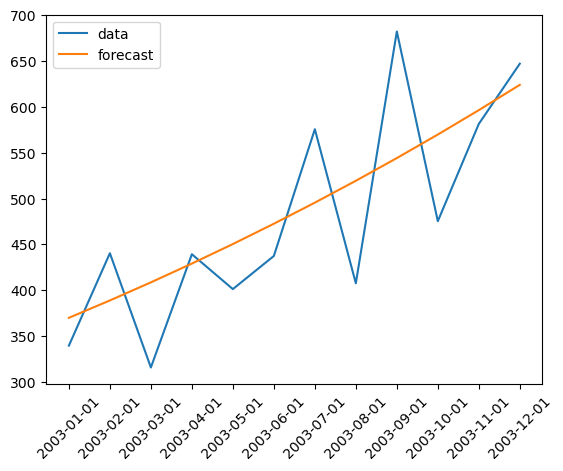

In [973]:
plt.plot(y_test, label = 'data')
plt.plot(ser, label = 'forecast')
plt.legend()
plt.xticks(rotation = 45)

- ARIMA 

In [981]:
model = ARIMA(y_train, order = (1,2,1), seasonal_order = (1,2,1,12))
fit= model.fit()
y_pred= fit.predict(start = len(y_train), end= len(y_train)+ len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters

2219.915011474347

In [ ]:
model = ARIMA(y_train, order=(1,2,1), seasonal_order = (1,2,1,24))
fit=model.fit()
y_pred= fit.predict(start= len(y_train), end= len(y_train)+ len(y_test)-1)
root_mean_squared_error(y_test, y_pred)

## WGEM dataset

In [990]:
gem= pd.read_csv("C:\\Users\\DAI.STUDENTSDC\\Desktop\\Machine_Learning\\Datasets\\WGEM-IND_CPTOTNSXN.csv", index_col = 0)

<Axes: xlabel='Date'>

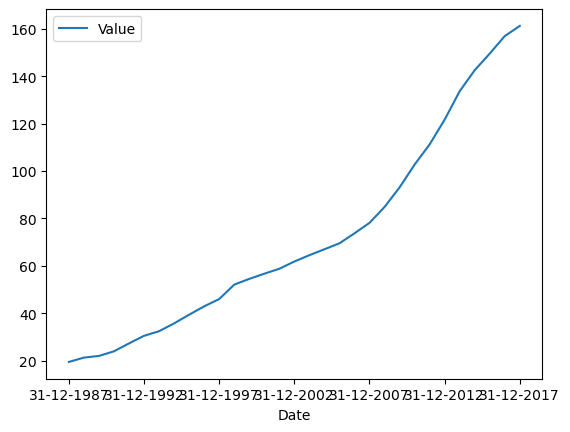

In [996]:
gem.plot()

In [998]:
y_train= gem[:-3]
y_test= gem[-3:]

- holt winters

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


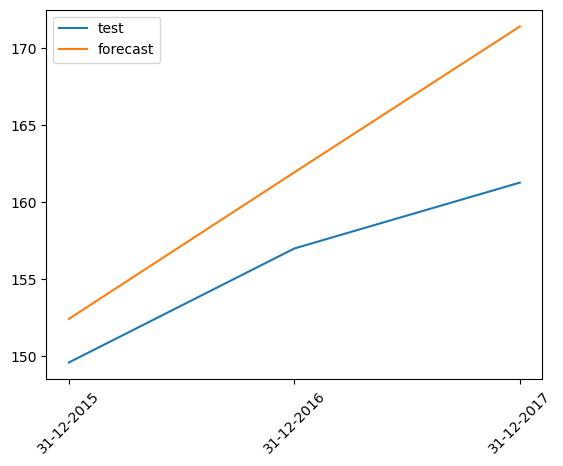

In [1002]:
hw_a = ExponentialSmoothing(y_train, trend = 'add', damped_trend = True)
fit = hw_a.fit()
pred = fit.forecast(len(y_test))
ser = pd.Series(pred, index = y_test.index)
error = round((root_mean_squared_error(y_test, pred)), 2)
plt.plot(y_test, label = 'test')
plt.plot(ser, label = 'forecast')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [1004]:
error

6.71

- Holt

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


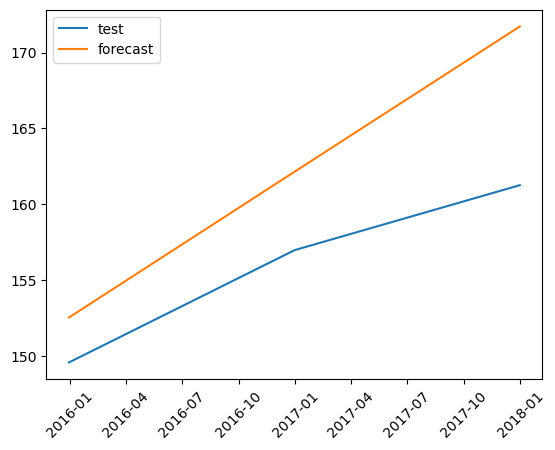

In [1030]:
holt = Holt(y_train,damped_trend = True)
fit = holt.fit()
pred = fit.forecast(len(y_test))
ser = pd.Series(pred, index = y_test.index)
error = round(root_mean_squared_error(y_test, pred),2)
error
plt.plot(y_test, label = 'test')
plt.plot(ser, label = 'forecast')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

- ARIMA

In [1019]:
model = auto_arima(y_train, trace = True, error_action = 'ignore', suppress_warnings = True) 
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test, y_pred)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=98.224, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=99.080, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=99.027, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=101.005, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=99.401, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.537 seconds


5.129815074680173

In [1023]:
model.params

C:\Users\DAI.STUDENTSDC\AppData\Roaming\Python\Python312\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<bound method ARIMA.params of ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

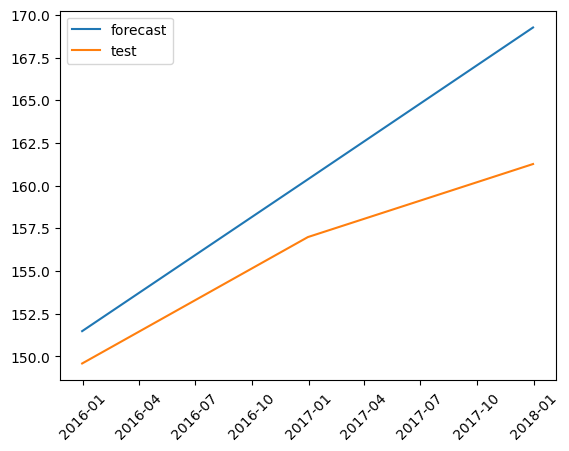

In [1027]:
y_test.index = y_pred.index
plt.plot(y_pred, label = 'forecast')
plt.plot(y_test, label = 'test')
plt.legend()
plt.xticks(rotation = 45)
plt.show()